<a href="https://colab.research.google.com/github/KwonWooChan/ColabNoteBook/blob/master/Subway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
myfile = files.upload()

Saving subway_time.csv to subway_time.csv


In [3]:
#전처리 구문
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family='NanumGothic Eco')	# 글꼴 정의
plt.rcParams['figure.figsize'] = (8, 8)	

In [4]:
LINE = input("호선 선택 : ").strip()

호선 선택1호선


In [13]:
#pd.read_csv
#호선 선택: data0
#승차 : dataIN
#하차 : dataOUT
data = pd.read_csv(io.BytesIO(myfile['subway_time.csv']))
data0 = data[1:]
data0 = data0[data0['호선명'] == LINE]
dataName = data0.iloc[:, [0,1]]
IN = []
OUT = []
for i in range(2,50, 2):
  IN.append(i)
for i in range(3,50, 2):
  OUT.append(i)
dataIN = data0.iloc[:, IN]
dataOUT = data0.iloc[:, OUT]

dataIN = dataIN.astype(int)
dataOUT = dataOUT.astype(int)

print(dataOUT.dtypes)

Unnamed: 3     int64
Unnamed: 5     int64
Unnamed: 7     int64
Unnamed: 9     int64
Unnamed: 11    int64
Unnamed: 13    int64
Unnamed: 15    int64
Unnamed: 17    int64
Unnamed: 19    int64
Unnamed: 21    int64
Unnamed: 23    int64
Unnamed: 25    int64
Unnamed: 27    int64
Unnamed: 29    int64
Unnamed: 31    int64
Unnamed: 33    int64
Unnamed: 35    int64
Unnamed: 37    int64
Unnamed: 39    int64
Unnamed: 41    int64
Unnamed: 43    int64
Unnamed: 45    int64
Unnamed: 47    int64
Unnamed: 49    int64
dtype: object


In [14]:
# Total 추가하기
dataINT = dataIN.iloc[:, [i for i in range(dataIN.shape[1])]]
dataIN['total'] =  dataINT.sum(axis=1)

# Total 추가하기
dataOUTT = dataIN.iloc[:, [i for i in range(dataIN.shape[1])]]
dataOUT['total'] =  dataOUTT.sum(axis=1)

,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39,Unnamed: 41,Unnamed: 43,Unnamed: 45,Unnamed: 47,Unnamed: 49,total
1,16,6038,33958,87958,181615,118758,58244,49543,49638,51064,47737,51264,52639,62540,70761,46397,29311,25836,21304,7638,570,0,0,0,2215274
2,3,885,4736,9312,25960,17233,19008,25363,29162,31275,29729,24902,18491,13719,10184,6541,4359,4261,5722,2344,1198,0,0,0,544484
3,0,3796,19145,61361,163028,72526,29275,28500,24614,24752,20324,17898,15466,16399,16486,7961,4567,3886,3391,1308,86,0,0,0,1059848
4,0,4407,22272,96690,214460,123990,50557,42624,37417,39635,32540,27789,28063,32017,38854,18640,6961,4585,3555,1341,133,2,0,0,1720444
5,25,3179,11751,25513,70038,71795,56584,54924,52780,53048,48562,39634,34289,30892,32492,15733,6094,4650,4657,2093,384,0,0,0,1354052


In [20]:
pdIN = pd.merge(dataName, dataIN, left_index=True, right_index=True, how='left')
pdOUT = pd.merge(dataName, dataOUT,left_index=True, right_index=True, how='left')

pdIN = pdIN.sort_values(by=['total'], ascending=False)
pdOUT = pdOUT.sort_values(by=['total'], ascending=False)

,호선명,지하철역,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39,Unnamed: 41,Unnamed: 43,Unnamed: 45,Unnamed: 47,Unnamed: 49,total
1,1호선,서울역,16,6038,33958,87958,181615,118758,58244,49543,49638,51064,47737,51264,52639,62540,70761,46397,29311,25836,21304,7638,570,0,0,0,2215274
4,1호선,종각,0,4407,22272,96690,214460,123990,50557,42624,37417,39635,32540,27789,28063,32017,38854,18640,6961,4585,3555,1341,133,2,0,0,1720444
5,1호선,종로3가,25,3179,11751,25513,70038,71795,56584,54924,52780,53048,48562,39634,34289,30892,32492,15733,6094,4650,4657,2093,384,0,0,0,1354052
6,1호선,종로5가,4,3522,16116,40606,104235,60934,48990,47244,45336,41843,41079,34727,28438,23791,20927,11152,5115,3876,3602,1735,222,0,0,0,1175896
10,1호선,청량리(서울시립대입구),35,4182,20446,17822,35547,32972,34110,37508,37808,39268,42791,41866,37809,38071,47049,31119,17988,16774,18519,6710,829,0,0,0,1128580
3,1호선,시청,0,3796,19145,61361,163028,72526,29275,28500,24614,24752,20324,17898,15466,16399,16486,7961,4567,3886,3391,1308,86,0,0,0,1059848
9,1호선,제기동,4,1979,8495,18388,41199,35867,38524,42149,40384,41322,44080,38746,29726,24626,25796,17802,11304,9670,11387,4462,355,0,0,0,949442
8,1호선,신설동,10,3003,10434,25832,63325,33302,19803,17286,17570,18026,16474,16554,17789,20608,25423,17926,11004,10231,11666,5136,294,0,0,0,737990
7,1호선,동대문,9,1948,7019,12473,24539,21668,20102,21479,21254,20567,20122,18620,17170,17516,18008,19044,12503,9819,10846,8304,1286,2,0,0,634512
2,1호선,동묘앞,3,885,4736,9312,25960,17233,19008,25363,29162,31275,29729,24902,18491,13719,10184,6541,4359,4261,5722,2344,1198,0,0,0,544484


TypeError: ignored

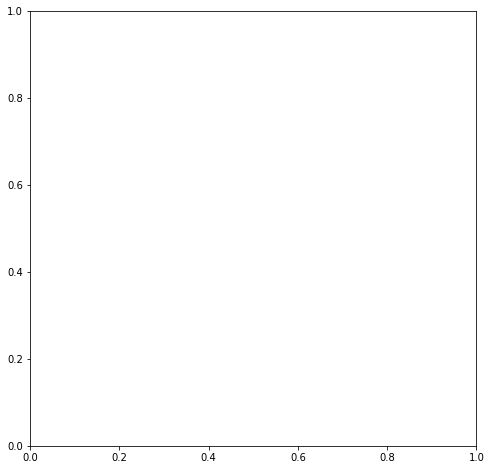

In [ ]:
plt.figure();
dataIN.iloc[0].plot()